In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
% matplotlib inline

# inspirations from:
#https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb
#https://www.kaggle.com/alexgeiger/insightful-vast-usa-statistics-eda-efa


pd.options.mode.chained_assignment = None

df = pd.read_csv('Data/real_estate_db.csv', encoding='ISO-8859-1',index_col='UID')
df.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,tract,...,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,tract,...,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,tract,...,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838
220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,tract,...,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563
220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,tract,...,34.96611,31.75000,20.49887,655.98066,2905.0,0.56936,0.51034,0.08315,0.06731,0.08711


In [209]:
df = df[df.columns.drop(list(df.filter(regex='mean')))]
df = df[df.columns.drop(list(df.filter(regex='rent_gt')))]
df = df[df.columns.drop(list(df.filter(regex='sample')))]
df = df[df.columns.drop(list(df.filter(regex='stdev')))]
df.drop(['BLOCKID','COUNTYID','STATEID','SUMLEVEL'], axis=1, inplace=True)

In [210]:
df.shape

(39030, 37)

In [211]:
df.isnull().sum()

state                            0
state_ab                         0
city                             0
place                            0
type                             0
primary                          0
zip_code                         0
area_code                        0
lat                              0
lng                              0
ALand                            0
AWater                           0
pop                              0
male_pop                         0
female_pop                       0
rent_median                    462
hi_median                      390
family_median                  434
hc_mortgage_median             841
hc_median                      890
home_equity_second_mortgage    677
second_mortgage                677
home_equity                    677
debt                           677
second_mortgage_cdf            677
home_equity_cdf                677
debt_cdf                       677
hs_degree                      275
hs_degree_male      

In [212]:
df = df.dropna()

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37941 entries, 220336 to 294334
Data columns (total 37 columns):
state                          37941 non-null object
state_ab                       37941 non-null object
city                           37941 non-null object
place                          37941 non-null object
type                           37941 non-null object
primary                        37941 non-null object
zip_code                       37941 non-null int64
area_code                      37941 non-null int64
lat                            37941 non-null float64
lng                            37941 non-null float64
ALand                          37941 non-null int64
AWater                         37941 non-null int64
pop                            37941 non-null int64
male_pop                       37941 non-null int64
female_pop                     37941 non-null int64
rent_median                    37941 non-null float64
hi_median                      37941 non-

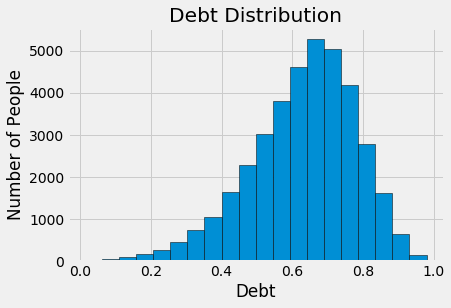

In [214]:
plt.style.use('fivethirtyeight')
plt.hist(df['debt'], bins = 20, edgecolor = 'k');
plt.xlabel('Debt'); plt.ylabel('Number of People'); 
plt.title('Debt Distribution');

In [215]:
df['debt'].describe()

count    37941.000000
mean         0.630552
std          0.149349
min          0.013590
25%          0.540110
50%          0.648560
75%          0.737090
max          0.979920
Name: debt, dtype: float64

In [216]:
df['type'].value_counts()

City       21064
Town        5151
CDP         5070
Village     4497
Borough     1699
Urban        460
Name: type, dtype: int64

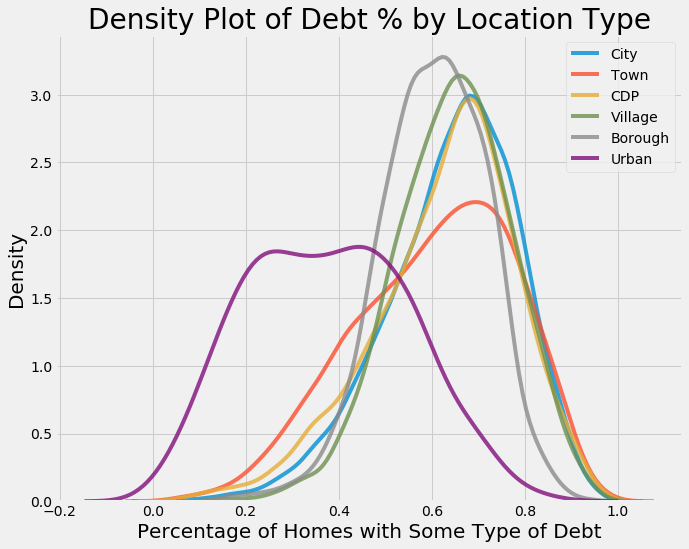

In [217]:
# Create a list of boroughs with more than 100 observations
location_type = df.dropna(subset=['debt'])
location_type = location_type['type'].value_counts()
location_type = list(location_type[location_type.values > 100].index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(10, 8))

# Plot each building
for location in location_type:
    # Select the building type
    subset = df[df['type'] == location]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['debt'].dropna(),
               label = location, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Percentage of Homes with Some Type of Debt', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Debt % by Location Type', size = 28);

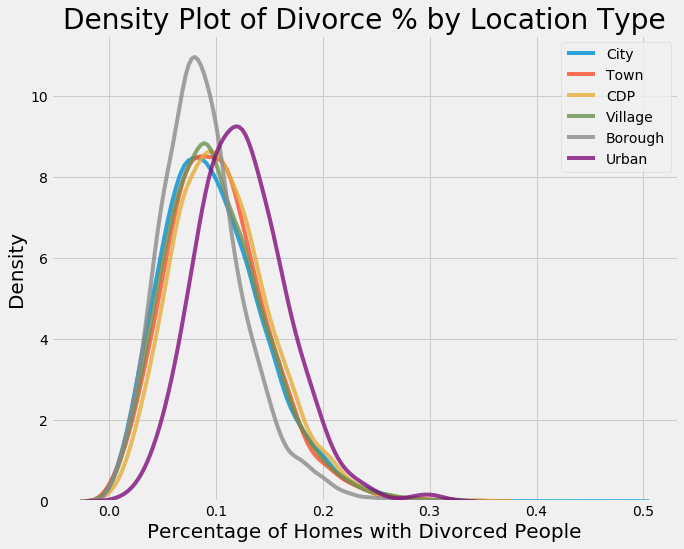

In [218]:
# Create a list of boroughs with more than 100 observations
location_type_div = df.dropna(subset=['divorced'])
location_type_div = location_type_div['type'].value_counts()
location_type_div = list(location_type_div[location_type_div.values > 100].index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(10, 8))

# Plot each building
for location in location_type_div:
    # Select the building type
    subset = df[df['type'] == location]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['divorced'].dropna(),
               label = location, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Percentage of Homes with Divorced People', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Divorce % by Location Type', size = 28);

In [219]:
# Create a list of boroughs with more than 100 observations
features = df.dropna(subset=['pop'])
features = features['type'].value_counts()
features = list(features[features.values > 100].index)

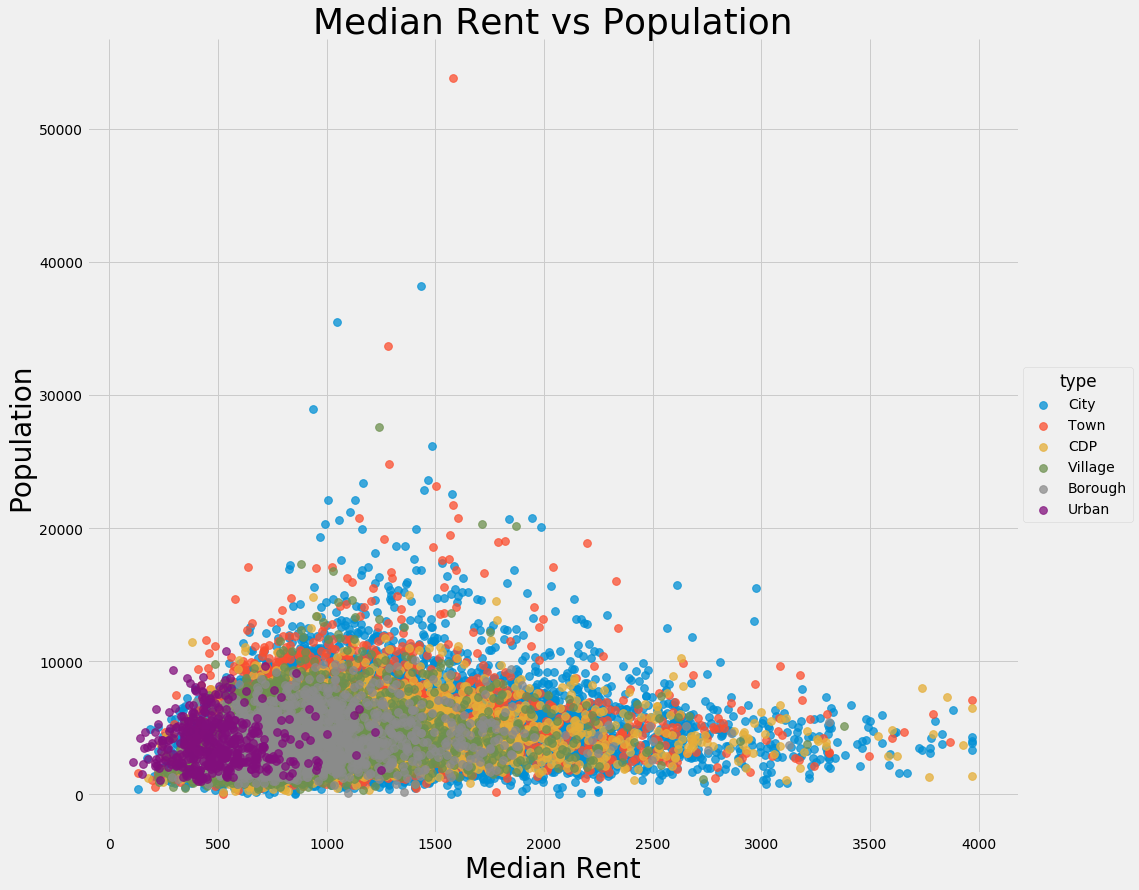

In [220]:
plt.figure(figsize=(10, 8))

df_copy = df

# Extract the building types
df_copy['type'] = df_copy.dropna(subset = ['pop'])['type']

# Limit to building types with more than 100 observations (from previous code)
df_copy = df_copy[df_copy['type'].isin(features)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('rent_median', 'pop', 
          hue = 'type', data = df_copy,
          scatter_kws = {'alpha': 0.75, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Median Rent", size = 28)
plt.ylabel('Population', size = 28)
plt.title('Median Rent vs Population', size = 36);

In [221]:
df.loc[df['pop'] > 50000]

,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,...,hs_degree,hs_degree_male,hs_degree_female,male_age_median,female_age_median,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
284935,Texas,TX,Katy,Cinco Ranch,Town,tract,77494,281,29.74428,-95.815507,...,0.95922,0.96302,0.95567,33.41667,33.83333,0.88447,0.73474,0.02058,0.00405,0.03036


In [222]:
high_pop = df.sort_values(by=['pop'], ascending=False)
high_pop = high_pop.head(750)

low_pop = df.sort_values(by=['pop'], ascending=False)
low_pop = low_pop.tail(750)

high_rent = df.sort_values(by=['rent_median'], ascending=False)
high_rent = high_rent.head(750)

low_rent = df.sort_values(by=['rent_median'], ascending=False)
low_rent = low_rent.tail(750)

In [223]:
correlations = df.corr()['rent_median'].dropna().sort_values()
correlations.head(15)

debt_cdf                      -0.454161
home_equity_cdf               -0.416052
divorced                      -0.369301
second_mortgage_cdf           -0.182903
separated                     -0.182877
lng                           -0.155319
married_snp                   -0.100683
ALand                         -0.070737
AWater                        -0.011459
lat                            0.001444
female_age_median              0.038242
area_code                      0.044033
zip_code                       0.065952
male_age_median                0.083655
home_equity_second_mortgage    0.140896
Name: rent_median, dtype: float64

In [224]:
correlations.tail(15)

male_pop              0.154850
female_pop            0.159495
pop                   0.159680
second_mortgage       0.164820
married               0.253058
hs_degree_female      0.297767
hs_degree             0.330716
hs_degree_male        0.341168
home_equity           0.417366
debt                  0.442107
hc_median             0.559184
family_median         0.669029
hc_mortgage_median    0.728551
hi_median             0.730370
rent_median           1.000000
Name: rent_median, dtype: float64

/Users/oliverphipps/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


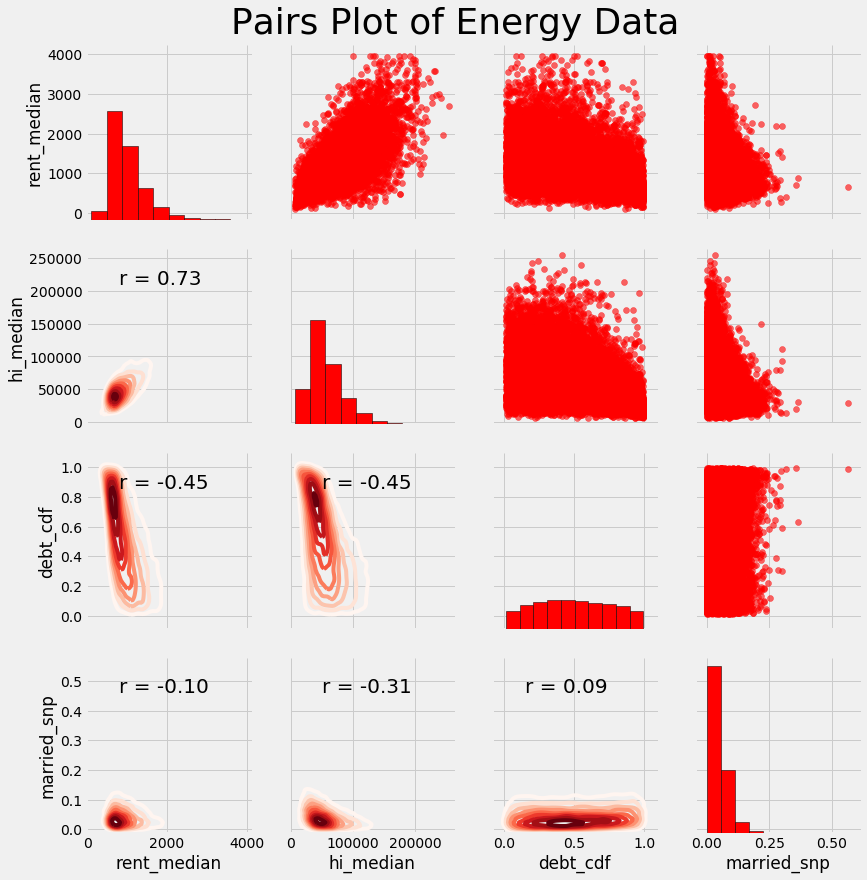

In [231]:
# Extract the columns to  plot
plot_data = df[['rent_median', 'hi_median', 
                      'debt_cdf', 
                      'married_snp']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);